# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat data dari folder raw
path = '../heart_raw/heart.csv'

# Membaca dataset
try:
    df = pd.read_csv(path)
    print("Dataset berhasil dimuat!")
    print(f"Ukuran Dataset: {df.shape}")
    display(df.head())
except Exception as e:
    print(f"Gagal memuat data: {e}")

Dataset berhasil dimuat!
Ukuran Dataset: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Check Missing Values
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Check Duplicates
723


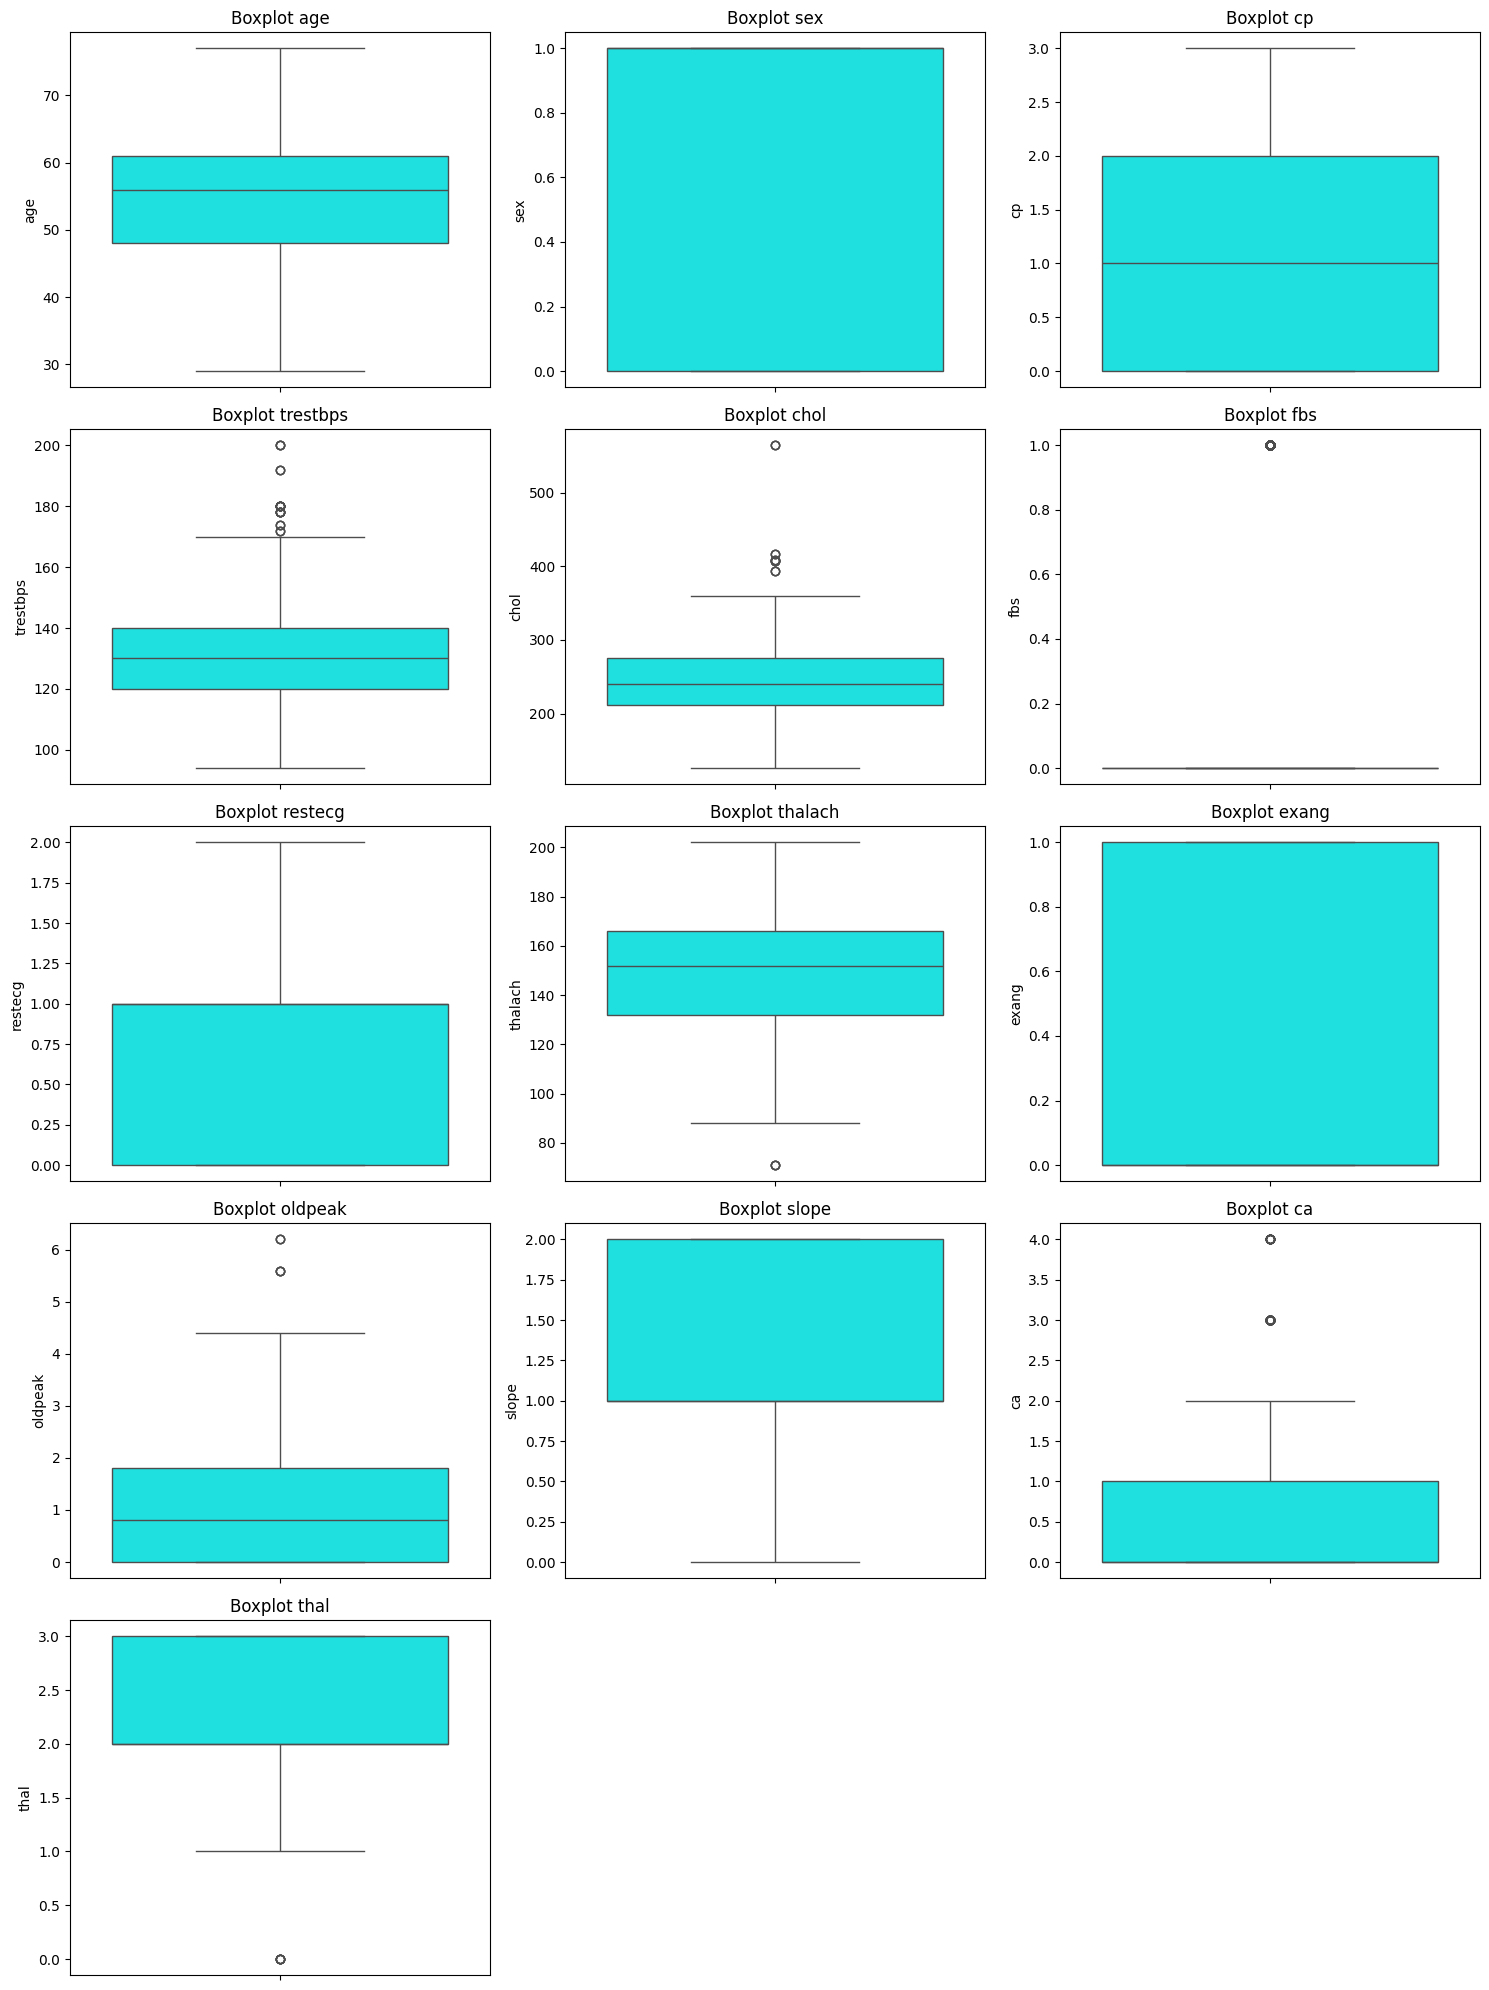

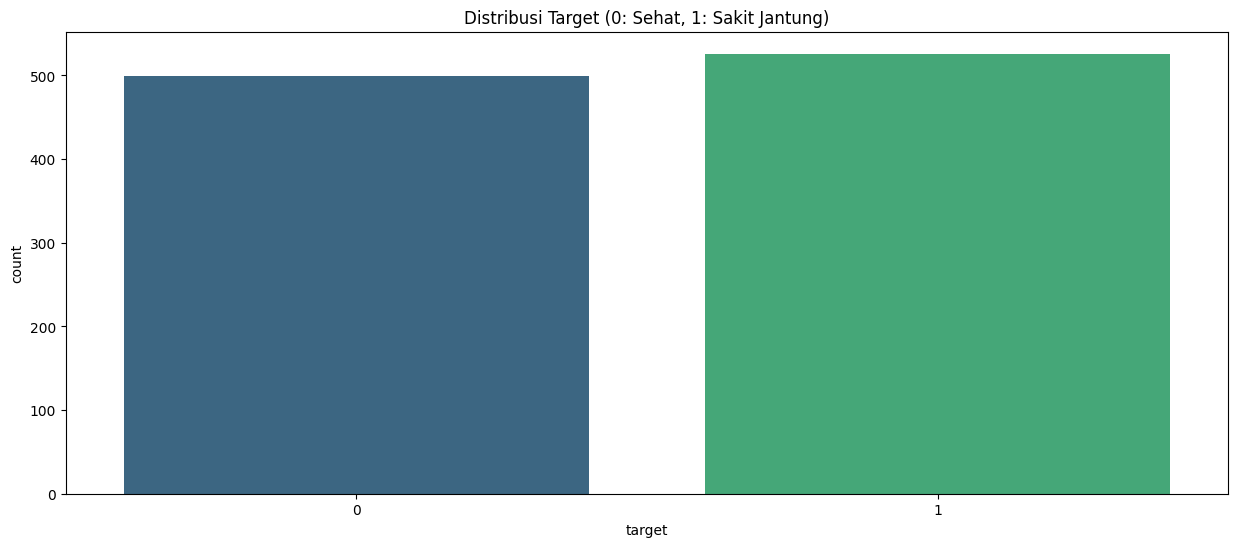

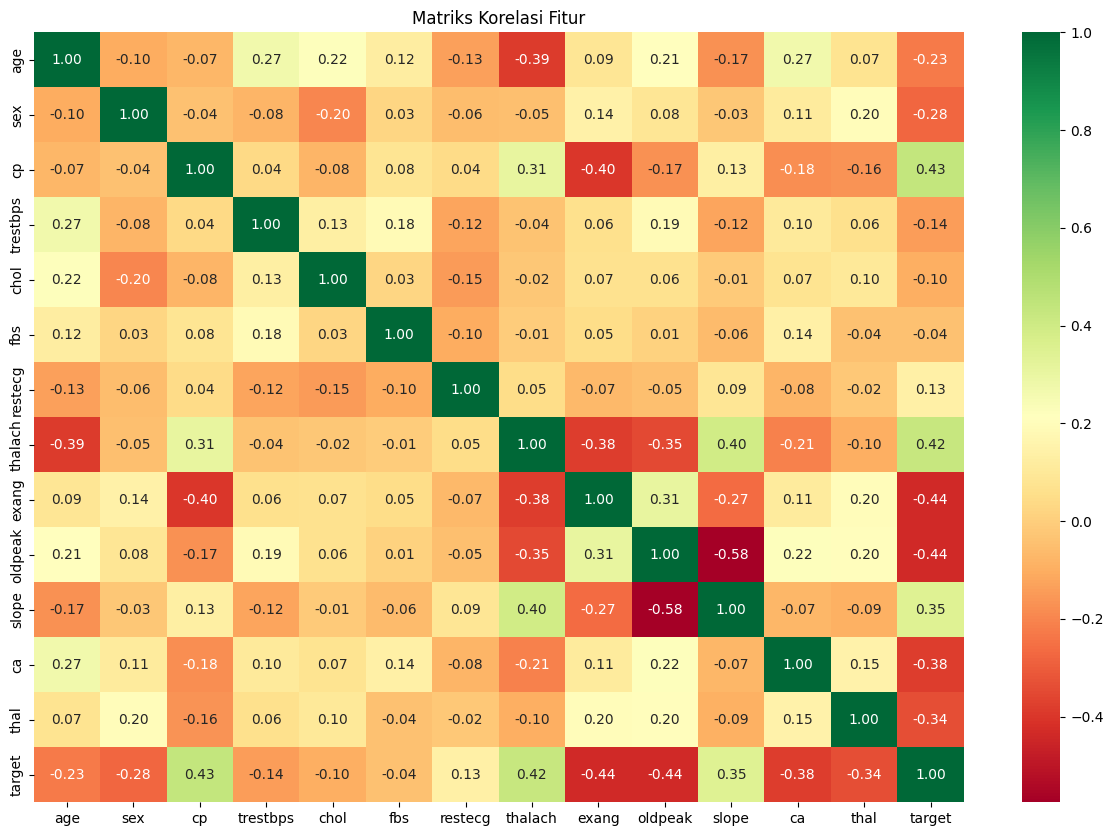

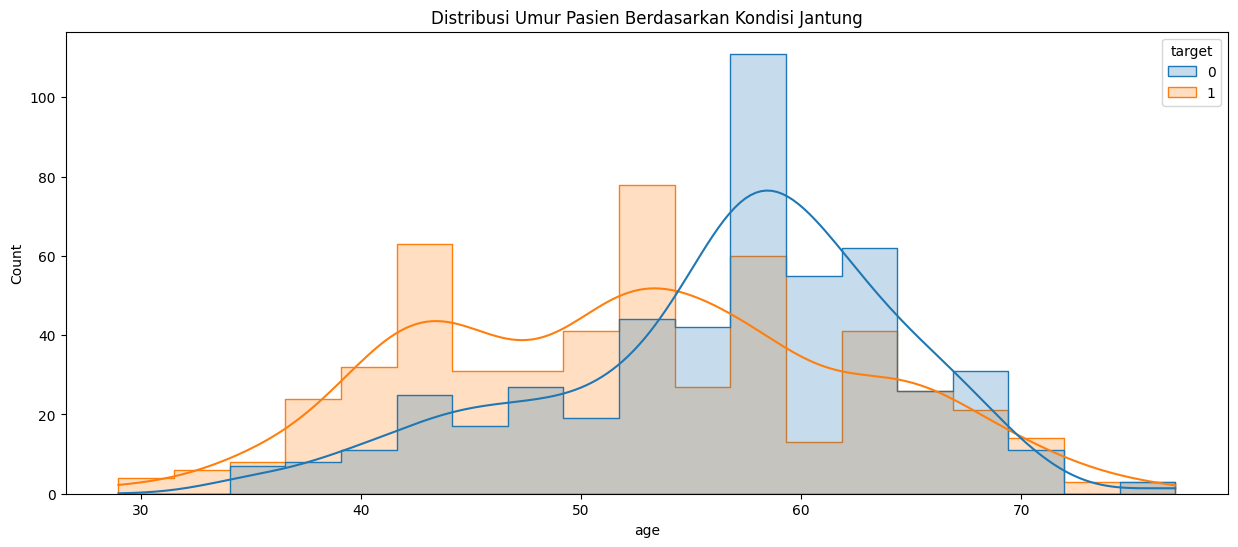

In [3]:
# 1. Cek Missing Values
print("Check Missing Values")
print(df.isnull().sum())

# 2. Cek Duplikat
print("\nCheck Duplicates")
print(df.duplicated().sum())

# 3. Deteksi Outlier Menggunakan Boxplot
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'target' in numeric_cols:
    numeric_cols.remove('target')

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col], color='cyan')
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

# 4. Visualisasi Distribusi Target
plt.figure(figsize=(15, 6))
sns.countplot(x='target', hue='target', data=df, palette='viridis', legend=False)
plt.title('Distribusi Target (0: Sehat, 1: Sakit Jantung)')
plt.show()

# 5. Analisis Korelasi Fitur Numerik
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Matriks Korelasi Fitur')
plt.show()

# 6. Distribusi Umur berdasarkan Target
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, element="step")
plt.title('Distribusi Umur Pasien Berdasarkan Kondisi Jantung')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Salin data untuk preprocessing
df_clean = df.copy()

# 1. Menghapus atau Menangani Data Kosong (Missing Values)
# Dalam dataset ini, tidak ada missing values, jadi kita lewati langkah ini.

# 2. Menghapus Duplikat
df_clean = df_clean.drop_duplicates()

# 3. Normalisasi atau Standarisasi Fitur Numerik
scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# 4. Penanganan Outlier
# Tidak dilakukan, karena data outlier sedikit, dan mungkin penting untuk analisis medis.

# 5. Encoding Data Kategorikal
# Semua fitur sudah dalam format numerik, jadi tidak perlu encoding tambahan.

# 6. Binning (Pengelompokan Data)
# Tidak dilakukan, karena tidak diperlukan untuk analisis ini.

# 7. Menyimpan Data Hasil Preprocessing
output_dir = 'heart_preprocessing'
os.makedirs(output_dir, exist_ok=True)
df_clean.to_csv(f"{output_dir}/heart_cleaned.csv", index=False)

print(f"Preprocessing selesai. Data disimpan di {output_dir}/heart_cleaned.csv")
print(f"Ukuran Dataset Setelah Preprocessing: {df_clean.shape}")

Preprocessing selesai. Data disimpan di heart_preprocessing/heart_cleaned.csv
Ukuran Dataset Setelah Preprocessing: (302, 14)
